In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
url = 'https://raw.githubusercontent.com/4GeeksAcademy/data-preprocessing-project-tutorial/main/AB_NYC_2019.csv'

df = pd.read_csv(url)

# Guardo el archivo
df.to_csv('../data/raw/Data.csv', index = False )

In [4]:
# No hay filas duplicadas
print(df['id'].duplicated().sum())

0


In [5]:
# Imprimo datos del Dataframe para estudio

print(df.shape,'\n----------------')
print(df.info())

# Observamos que hay menos valores que los totales en
# name, host_name, last review, reviews_per_month

(48895, 16) 
----------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  la

In [6]:
# Compruebo si hay duplicados en las filas que no deberian tenerlos
# En este caso las filas que no deberia tener son: id, name, host_id y host_name

print(f'Hay {df["id"].duplicated().sum()} casas con el mismo id')
print(f'Hay {df["name"].duplicated().sum()} nombres de casas iguales')
print(f'Hay {df["host_id"].duplicated().sum()} hosts con el mismo id')
print(f'Hay {df["host_name"].duplicated().sum()} hosts con el mismo nombre')


Hay 0 casas con el mismo id
Hay 989 nombres de casas iguales
Hay 11438 hosts con el mismo id
Hay 37442 hosts con el mismo nombre


Teniendo esto en cuenta, lo que mas nos interesa saber es que no hay casas que compartan ID por lo tanto son individuales. 
En el caso del nombre de las casas, dos casas pueden tener un mismo nombre, ademas es un dato redundante, ya que podemos tener en cuenta las ID que son identificadores unicos.

Un host puede tener mas de una casa a su nombre, teniendo en cuenta esto, el host_id seria algo unico por host, ademas de que hay menor numero de duplicados que en host_name. Por lo tanto son datos redundantes.

In [7]:
df.drop(columns=['reviews_per_month', 'last_review', 'number_of_reviews', 'name', 'host_name'], inplace=True)
df

,id,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,calculated_host_listings_count,availability_365
0,2539,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,6,365
1,2595,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,2,355
2,3647,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,1,365
3,3831,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,1,194
4,5022,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,1,0
...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,8232441,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,2,9
48891,36485057,6570630,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,2,36
48892,36485431,23492952,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,1,27
48893,36485609,30985759,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,6,2


Elimino las columnas que considero recurrentes, junto con las que tienen gran cantidad de datos nulos.

Ademas considero que es un dato subjetivo que puede no tener correlacion con el resto de datos.

La cantidad de datos que faltan en estas columnas asciende hasta el 25% del total.

Elimino tambien el ID, una vez comprobado que no hay duplicados, puedo usar el indice como indicador individual para cada casa

Variables categoricas = id, host_id, neighbourhood_group, neighbourhood, room_type, availability_365



variables numericas = price, minimum_nights, calculated_host_listings_count

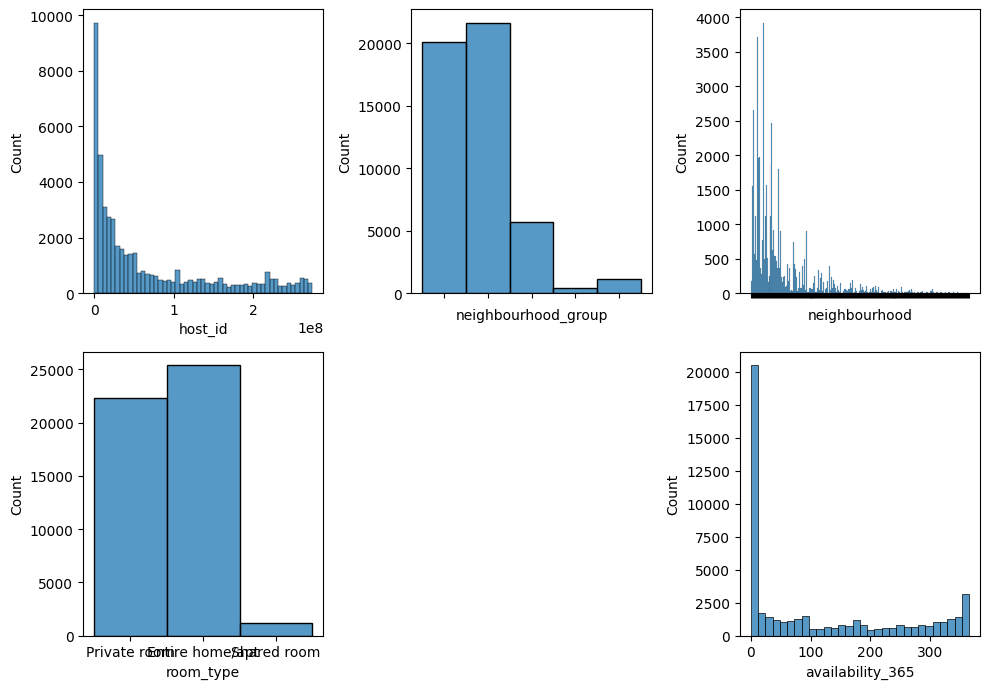

In [8]:
fig, axis = plt.subplots(2, 3, figsize = (10, 7))

# Crear un histograma múltiple
sns.histplot(ax = axis[0, 0], data = df, x = "host_id")
sns.histplot(ax = axis[0, 1], data = df, x = "neighbourhood_group").set(xticklabels=[])
sns.histplot(ax = axis[0, 2], data = df, x = "neighbourhood").set(xticklabels=[])
sns.histplot(ax = axis[1, 0], data = df, x = "room_type")
sns.histplot(ax = axis[1, 2], data = df, x = "availability_365")
fig.delaxes(axis[1, 1])
# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

Podemos observar lo siguiente con estos datos:

    - Hay varios hosts con más de una casa en alquiler, razón por la que se repite el host_id en más de una ocasión
    - La cantidad de barrios de los que disponemos datos es 5, teniendo algunos de ellos varias veces mas que el resto, hay dos en los que se distribuye la mayor parte de las casas
    - Lo que mas se oferta es una una casa en alquiler o una habitacion privada, siendo la habitacion compartida bastante inferior
    - Hay muchas habitaciones con valor 0, lo cual puede ser un error o falta de informacion.

## Ahora grafico los valores numericos

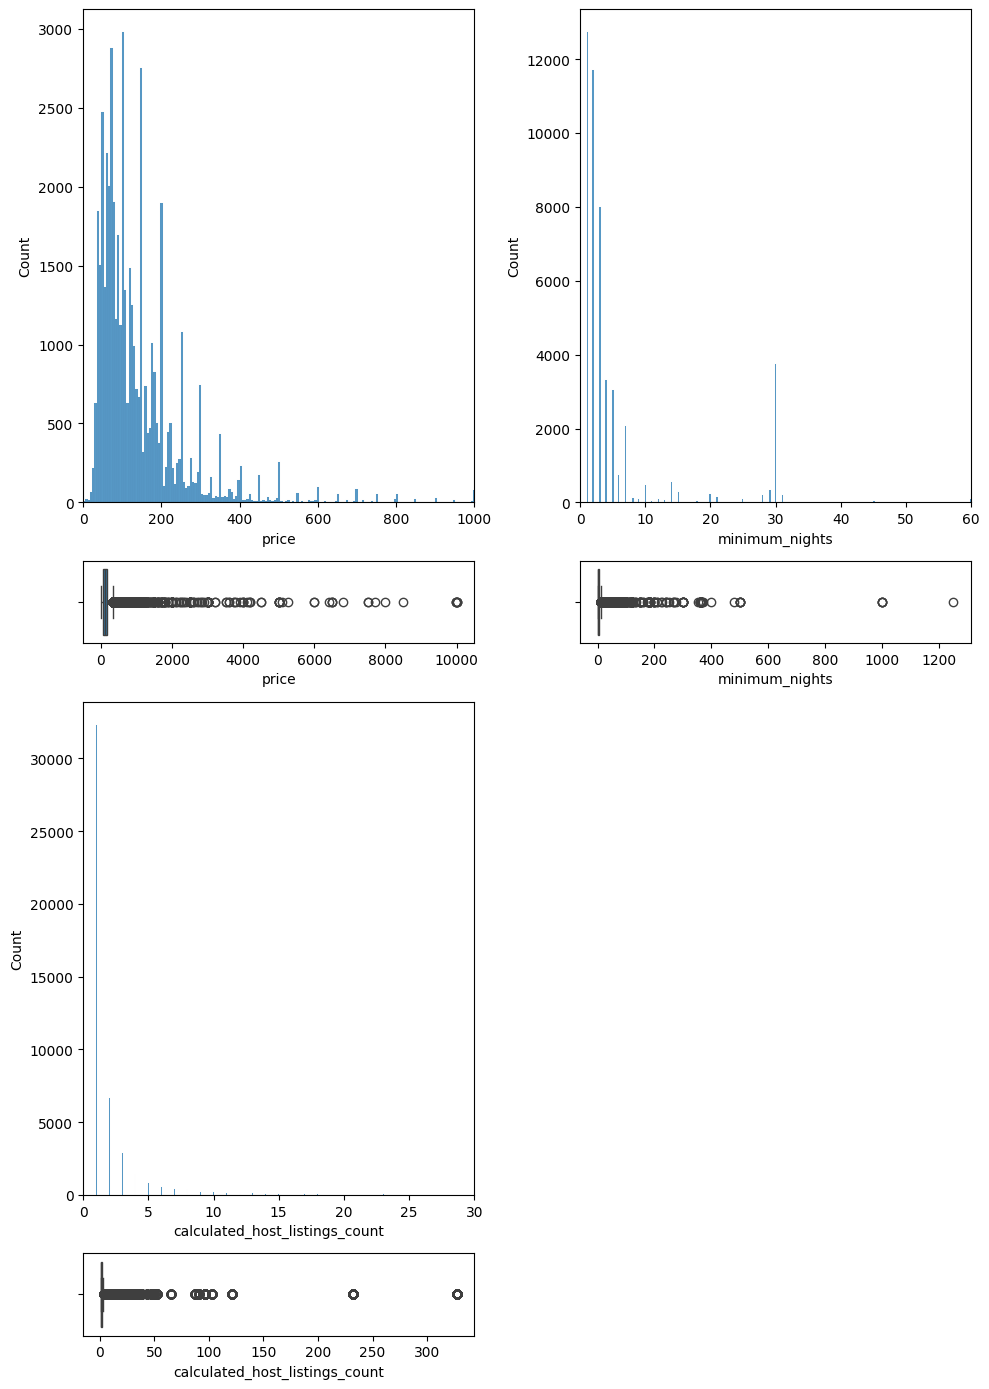

In [19]:
fig, axis = plt.subplots(4, 2, figsize = (10, 14), gridspec_kw = {"height_ratios": [6, 1, 6, 1]})

sns.histplot(ax = axis[0, 0], data = df, x = "price").set_xlim(0, 1000)
sns.boxplot(ax = axis[1, 0], data = df, x = "price")

sns.histplot(ax = axis[0, 1], data = df, x = "minimum_nights").set_xlim(0, 60)
sns.boxplot(ax = axis[1, 1], data = df, x = "minimum_nights")

sns.histplot(ax = axis[2,0], data = df, x = "calculated_host_listings_count").set_xlim(0, 30)
sns.boxplot(ax = axis[3, 0], data = df, x = "calculated_host_listings_count")

fig.delaxes(axis[2, 1])
fig.delaxes(axis[3, 1])
# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()



Podemos observar que la mayoria de precios se encuentran por debajo de los 500 dolares por noche.

El minimo de noches se situa mayormente entre 1 y 7 dias, siendo los 30 dias otro valor a tener en cuenta. Al ser alquileres vacacionales, esto coincidiria con una mensualidad y tendria sentido.

Respecto a calculated_host_listings_count, vemos que la mayoria se situa por debajo de los 5 dias

## Analisis de variables multivariantes
Analizo si hay correlacion entre las variables numericas y el target(price)

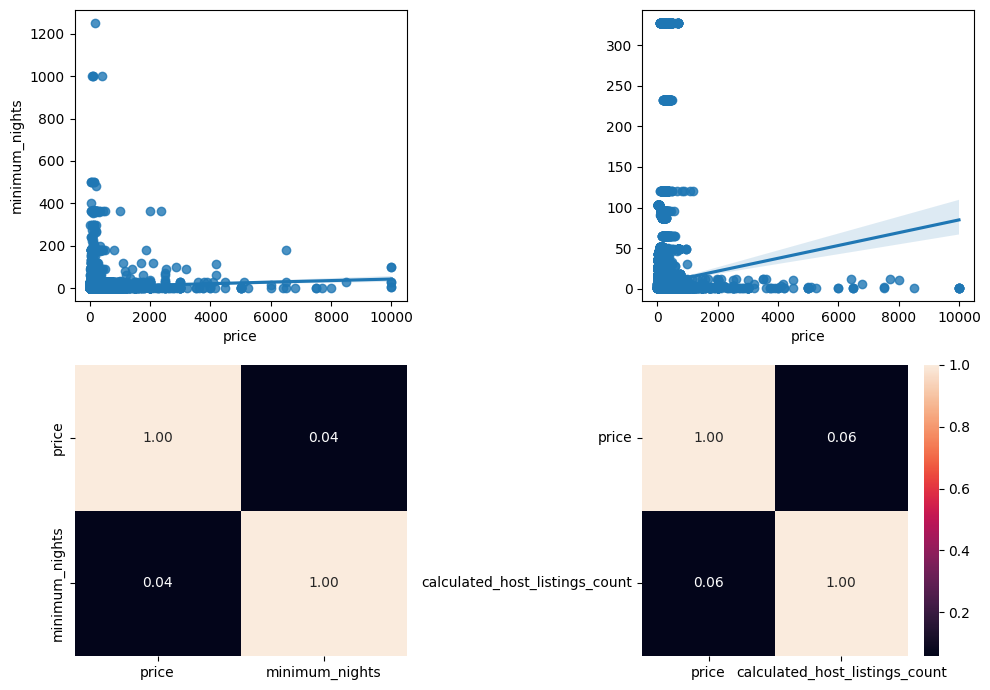

In [10]:
fig, axis = plt.subplots(2, 2, figsize = (10, 7))

# 
sns.regplot(ax = axis[0, 0], data = df, x = "price", y = "minimum_nights")
sns.heatmap(df[["price", "minimum_nights"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)
sns.regplot(ax = axis[0, 1], data = df, x = "price", y = "calculated_host_listings_count").set(ylabel=None)
sns.heatmap(df[["price", "calculated_host_listings_count"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1])

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

Se puede observar que existe una correlacion muy debil entre el precio y el minimo de noches o calculated_host_listing_count, siendo esta tan baja, no lo consirare como un factor a la hora de estipular el precio de una casa

### Analisis categorico - categorico

En este punto la correlacion que me puede interesar es comparar el tipo de barrio junto con el tipo de alquiler. 

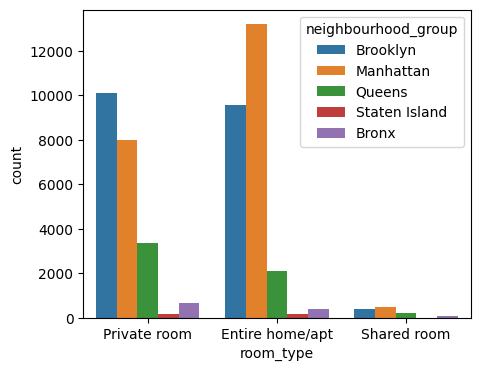

In [11]:
# id, host_id, neighbourhood_group, neighbourhood, room_type, availability_365

fig, axis = plt.subplots(figsize = (5, 4))

sns.countplot(data = df, x = "room_type", hue = "neighbourhood_group")

plt.show()


Se puede observar que Manhattan es el barrio donde mas casas se alquilan y brooklyn por poco es el barrio donde mas habitaciones. En cuanto a las habitaciones compartidas los barrios son bastante equitativos

# Analisis numerico - Categorico

In [12]:
print(df["neighbourhood_group"].dtype)
print(df["room_type"].dtype)
print(df["neighbourhood"].dtype)

object
object
object


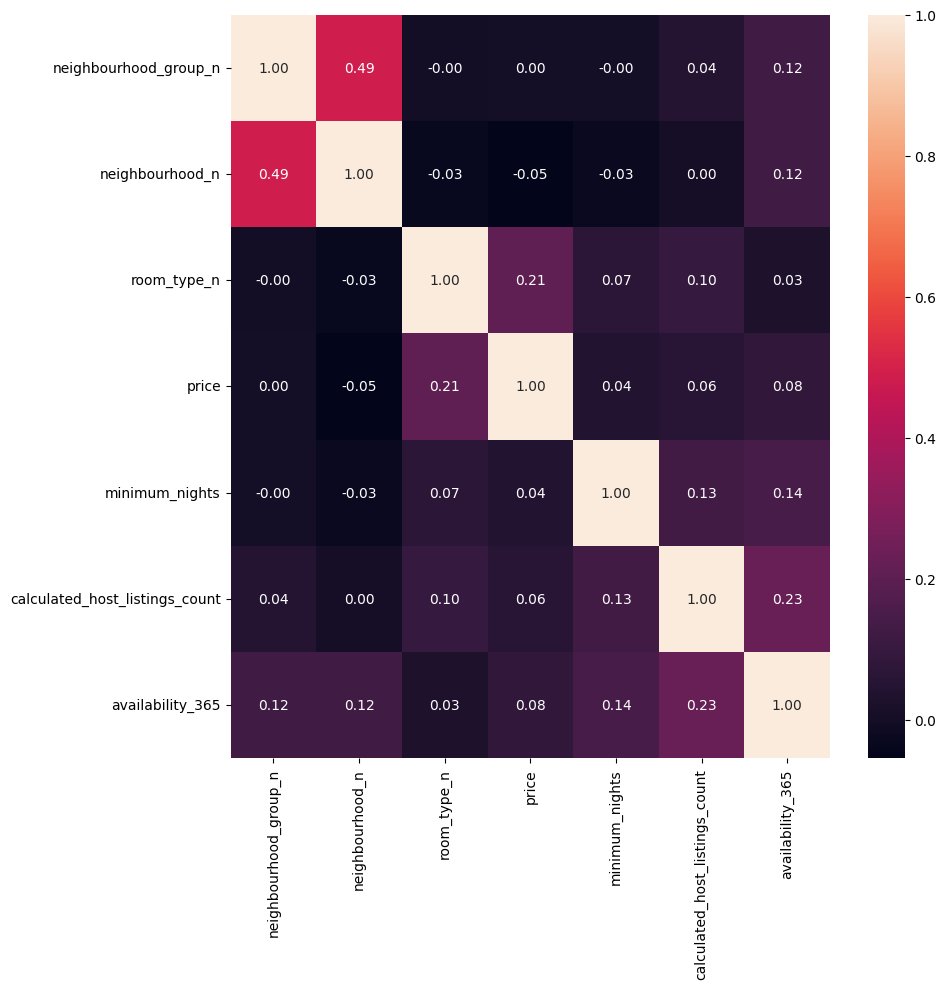

In [13]:
import json

# Factorizo y guardo las claves en diccionarios .json para saber las reglas de transformacion

df["room_type_n"] = pd.factorize(df["room_type"])[0]
room_type_transformation_rules = {row["room_type"]: row["room_type_n"] for _, row in df[["room_type", "room_type_n"]].drop_duplicates().iterrows()}

with open("room_type_n_transformation_rules.json", "w") as f:
  json.dump(room_type_transformation_rules, f)


df["neighbourhood_group_n"] = pd.factorize(df["neighbourhood_group"])[0]
neighbourhood_group_transformation_rules = {row["neighbourhood_group"]: row["neighbourhood_group_n"] for _, row in df[["neighbourhood_group", "neighbourhood_group_n"]].drop_duplicates().iterrows()}

with open("neighbourhood_group_n.json", "w") as f:
  json.dump(neighbourhood_group_transformation_rules, f)


df["neighbourhood_n"] = pd.factorize(df["neighbourhood"])[0]
neighbourhood_transformation_rules = {row["neighbourhood"]: row["neighbourhood_n"] for _, row in df[["neighbourhood", "neighbourhood_n"]].drop_duplicates().iterrows()}

with open("neighbourhood_n.json", "w") as f:
  json.dump(neighbourhood_transformation_rules, f)





fig, axes = plt.subplots(figsize=(10, 10))

sns.heatmap(df[["neighbourhood_group_n", "neighbourhood_n", "room_type_n", "price", "minimum_nights", "calculated_host_listings_count", "availability_365"]].corr(), annot = True, fmt = ".2f")

plt.tight_layout()

# Draw Plot
plt.show()

Factorizo las variables que voy a utilizar para comparar.